In [1]:
#importing main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

# READING DATASET

In [2]:
data=pd.read_csv(r'C:\Users\Smitha.s1_oob\OneDrive - GEMS Education\Desktop\city_day.csv')

In [3]:
data.head()

,State,City,station,StationName,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# EXPLORATORY DATA ANALYSIS

In [4]:
data.dtypes

State           object
City            object
station         object
StationName     object
Status          object
Date            object
PM2.5          float64
PM10           float64
NO             float64
NO2            float64
NOx            float64
NH3            float64
CO             float64
SO2            float64
O3             float64
Benzene        float64
Toluene        float64
Xylene         float64
AQI            float64
AQI_Bucket      object
dtype: object

In [5]:
data.shape

(29531, 20)

In [6]:
data.columns

Index(['State', 'City', 'station', 'StationName', 'Status', 'Date', 'PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


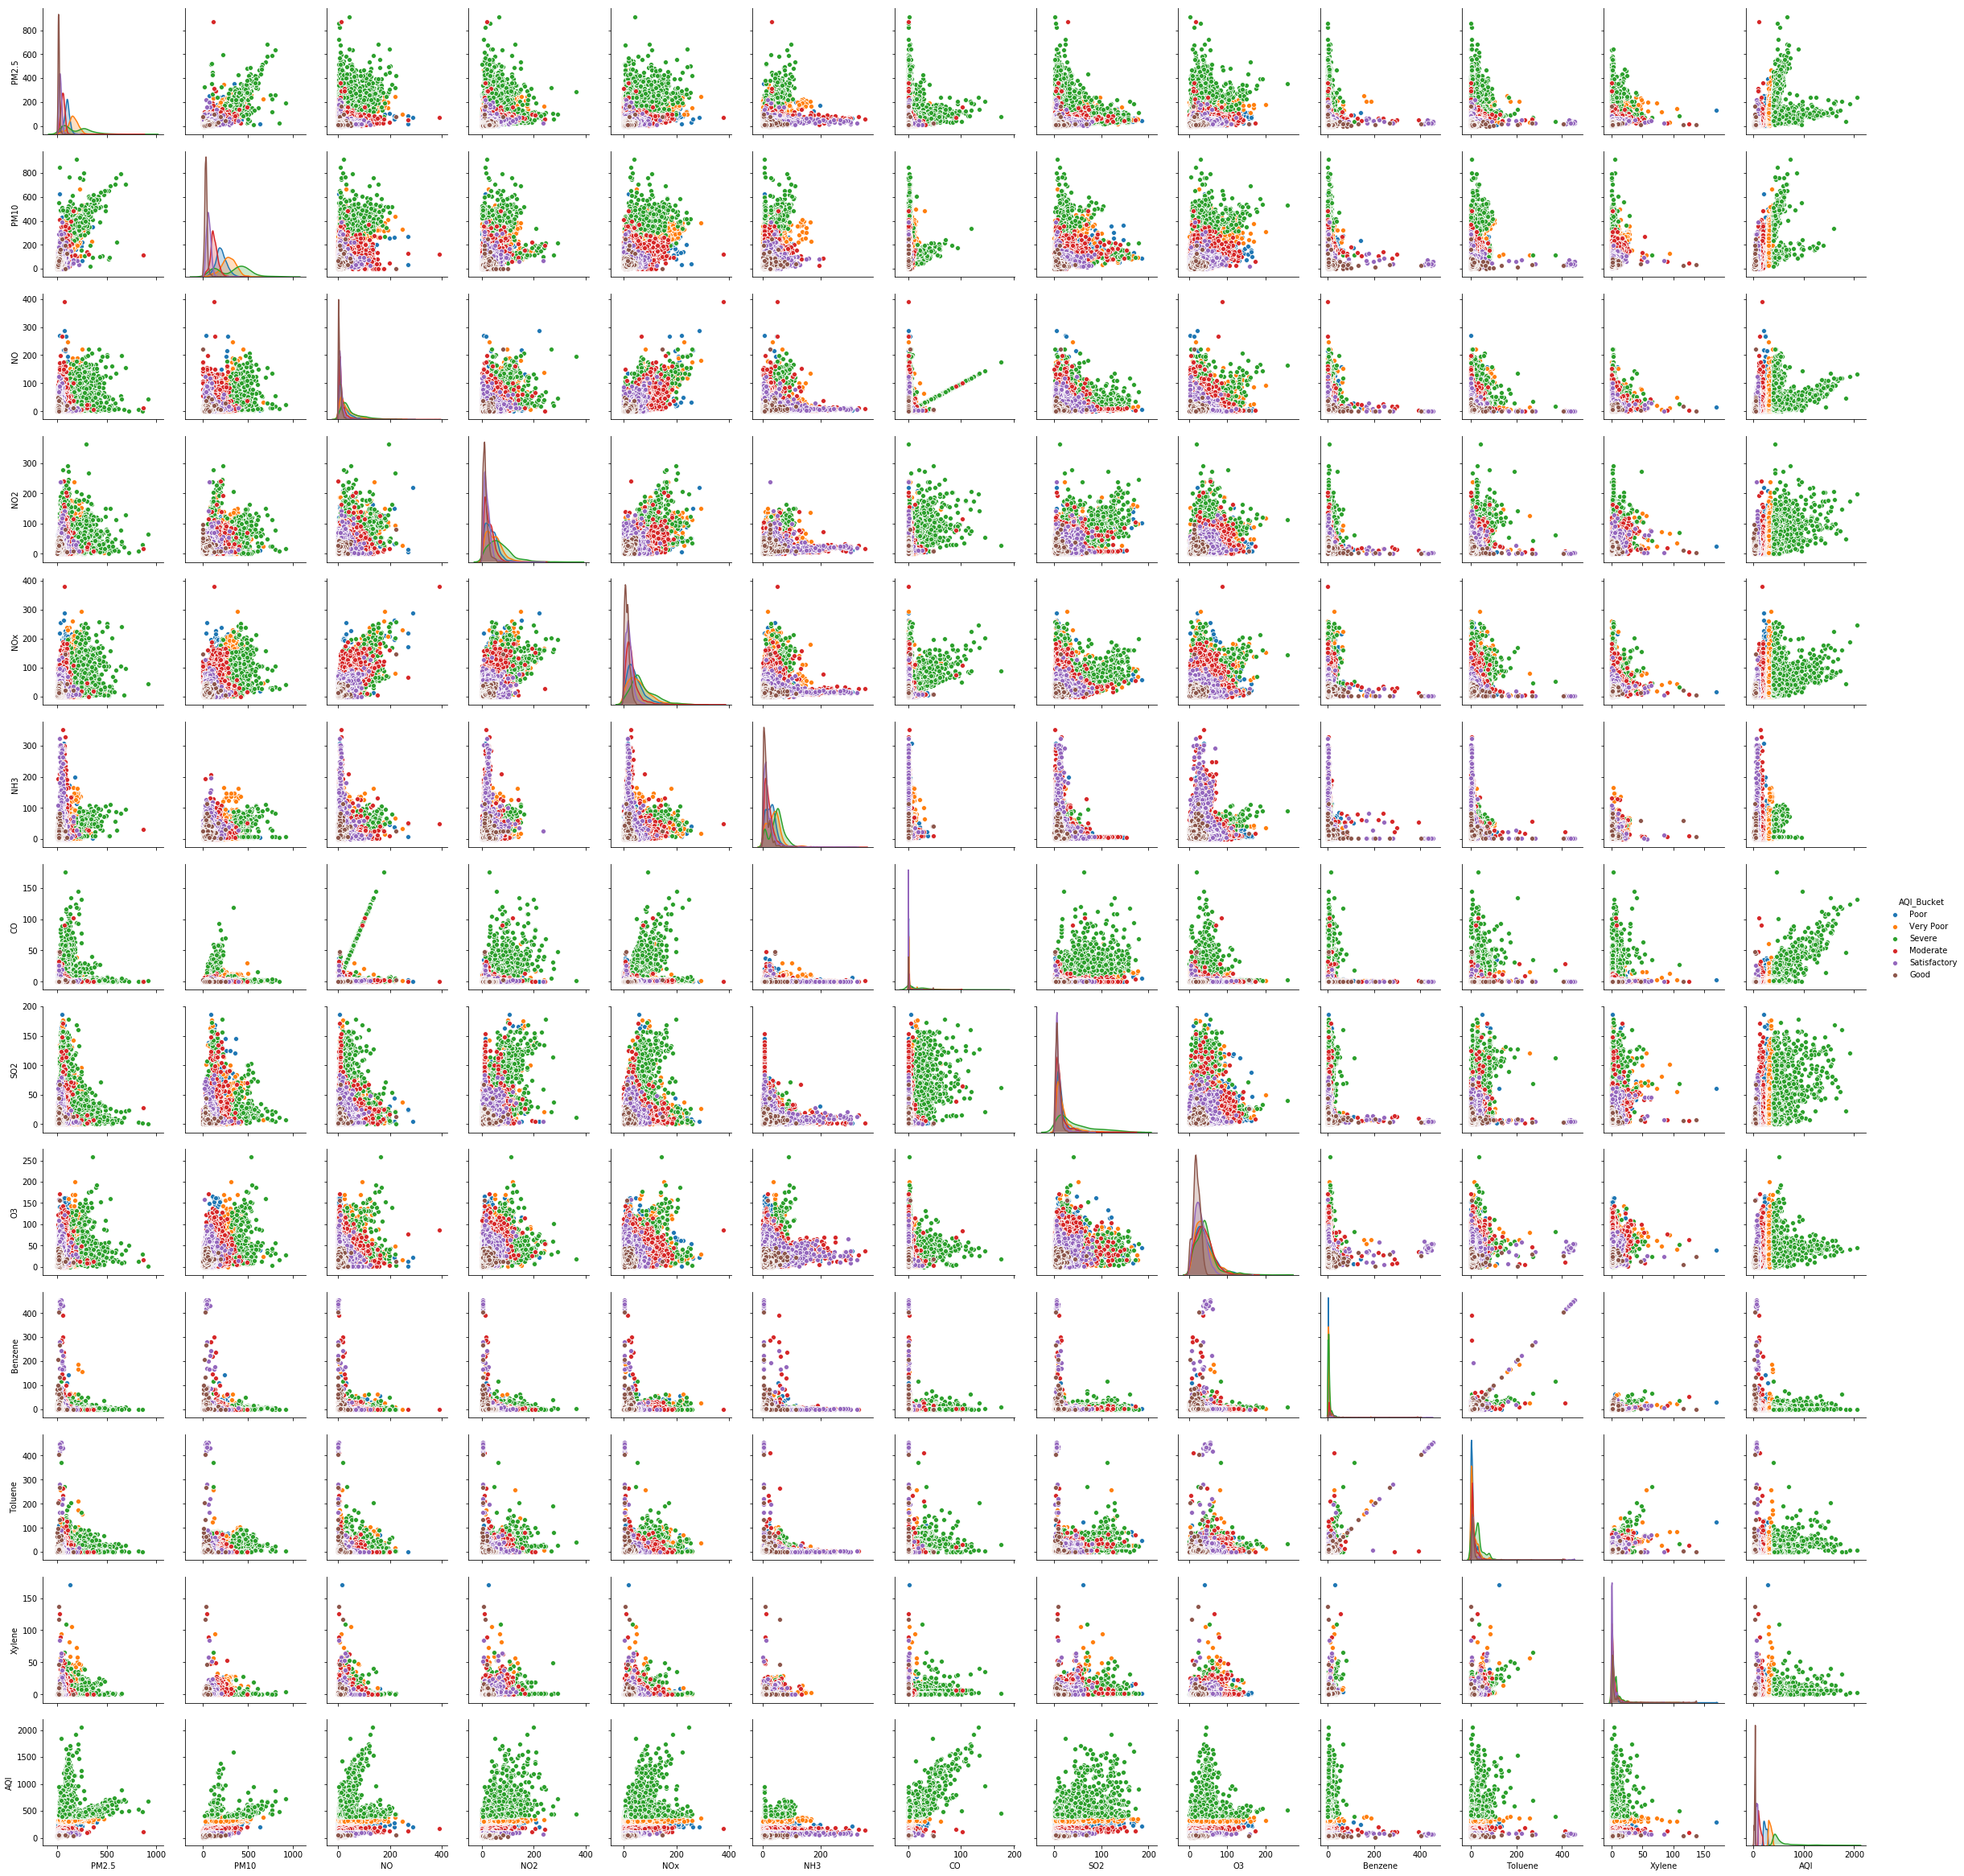

In [7]:
sns.pairplot(data=data,hue='AQI_Bucket')

# HANDLING NULL VALUES

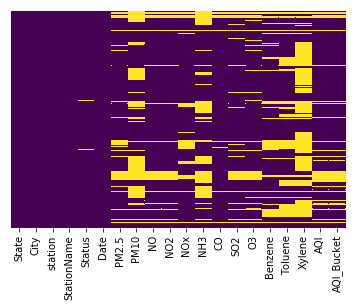

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
data.isna().sum()

State              0
City               0
station            0
StationName        0
Status           324
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
AQI_Bucket      4681
dtype: int64

In [10]:
null_values_percent=(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)
null_values_percent

Xylene         61.322001
PM10           37.723071
NH3            34.973418
Toluene        27.229014
Benzene        19.041008
AQI_Bucket     15.851139
AQI            15.851139
PM2.5          15.570079
NOx            14.171549
O3             13.619586
SO2            13.050692
NO2            12.139785
NO             12.129626
CO              6.972334
Status          1.097152
Date            0.000000
StationName     0.000000
station         0.000000
City            0.000000
State           0.000000
dtype: float64

In [11]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [12]:
#Converting dtype of date column to datetime
data['Date'] = pd.to_datetime(data['Date'])


In [13]:
data['year'] = data['Date'].apply(lambda x:x.year)
data['month'] = data['Date'].apply(lambda x:x.month)
data['day'] = data['Date'].apply(lambda x:x.day)

In [14]:
data=data.drop(['Date','station','StationName','Status'],axis=1)

In [15]:
data.columns

Index(['State', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'year', 'month', 'day'],
      dtype='object')

In [16]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


In [17]:
data.loc[:,'PM2.5':'Xylene']=data.groupby('City').transform(lambda x:x.fillna(x.mean()))

In [18]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


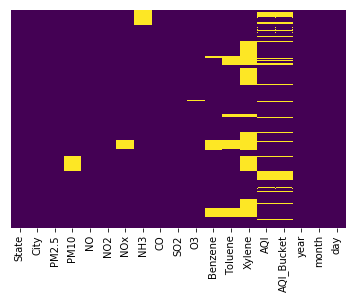

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
data.loc[:,'PM2.5':'Xylene']=data.fillna(data.mean())

In [21]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


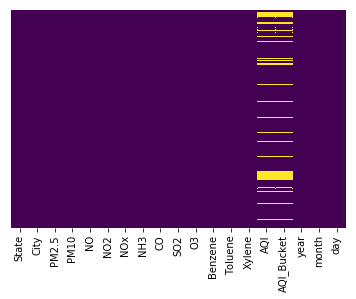

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# AQI CALCULATION

In [23]:
#PM10 sub_index calculation
def get_PM10_subindex(x):
    if x<=50:
        return x
    elif x>50 and x<=100:
        return x
    elif x>100 and x<=250:
        return 100+(x-100)*100/150
    elif x>250 and x<=350:
        return 200+(x-250)
    elif x>350 and x<=430:
        return 300+(x-350)*100/80
    elif x>430:
        return 400+(x-430)*100/80
    else:
        return 0
data['PM10_subindex']=data['PM10'].astype(int).apply(lambda x:get_PM10_subindex(x))
d1=data[['PM10','PM10_subindex']]
d1.head()
    
    

,PM10,PM10_subindex
0,114.584029,109.333333
1,114.584029,109.333333
2,114.584029,109.333333
3,114.584029,109.333333
4,114.584029,109.333333


In [ ]:
def get_PM25_subindex(x):
    if x<=30:
        return x*50/30
    elif x>30 and x<=60:
        return 50+(x-30)*50/30
    elif x>60 and x<=90:
        return 100+(x-60)*100/30
    elif x>90 and x<=120:
        return 200+(x-90)*100/30
    elif x>120 and x<=250:
        return 300+(x-120)*100/130
    elif x>250:
        return 400+(x-250)*100/130
    else:
        return 0
data['PM2.5_subindex']=data['PM2.5'].astype(int).apply(lambda x:get_PM25_subindex(x))
    

In [ ]:
def get_SO2_subindex(x):
    if x<=40:
        return x*50/40
    elif x>40 and x<=80:
        return 50+(x-40)*50/40
    elif x>80 and x<=380:
        return 100+(x-80)*100/300
    elif x>380 and x<=800:
        return 200+(x-380)*100/420
    elif x>800 and x<=1600:
        return 300+(x-800)*100/800
    elif x>1600:
        return 400+(x-1600)*100/800
    else:
        return 0
data['SO2_subindex']=data['SO2'].astype(int).apply(lambda x:get_SO2_subindex(x))
    

In [ ]:
def get_NOx_subindex(x):
    if x<=40:
        return x*50/40
    elif x>40 and x<=80:
        return 50+(x-40)*50/40
    elif x>80 and x<=180:
        return 100+(x-80)*100/100
    elif x>180 and x<=280:
        return 200+(x-180)*100/100
    elif x>280 and x<=400:
        return 300+(x-280)*100/120
    elif x>400:
        return 400+(x-400)*100/120
    else:
        return 0
data['NOx_subindex']=data['NOx'].astype(int).apply(lambda x:get_NOx_subindex(x))

In [ ]:
def get_NH3_subindex(x):
    if x<=200:
        return x*50/200
    elif x>200 and x<=400:
        return 50+(x-200)*50/200
    elif x>400 and x<=800:
        return 100+(x-400)*100/400
    elif x>800 and x<=1200:
        return 200+(x-800)*100/400
    elif x>1200 and x<=1800:
        return 300+(x-1200)*100/600
    elif x>1800:
        return 400+(x-1800)*100/600
    else:
        return 0
data['NH3_subindex']=data['NH3'].astype(int).apply(lambda x:get_NH3_subindex(x))

In [ ]:
def get_CO_subindex(x):
    if x<=1:
        return x*50/1
    elif x>1 and x<=2:
        return 50+(x-1)*50/1
    elif x>2 and x<=10:
        return 100+(x-2)*100/8
    elif x>10 and x<=17:
        return 200+(x-10)*100/7
    elif x>17 and x<=34:
        return 300+(x-17)*100/17
    elif x>34:
        return 400+(x-34)*100/17
    else:
        return 0
data['CO_subindex']=data['CO'].astype(int).apply(lambda x:get_CO_subindex(x))

In [ ]:
def get_O3_subindex(x):
    if x<=50:
        return x*50/50
    elif x>50 and x<=100:
        return 50+(x-50)*50/50
    elif x>100 and x<=168:
        return 100+(x-100)*100/68
    elif x>168 and x<=208:
        return 200+(x-168)*100/40
    elif x>208 and x<=748:
        return 300+(x-208)*100/539
    elif x>748:
        return 400+(x-400)*100/539
    else:
        return 0
data['O3_subindex']=data['O3'].astype(int).apply(lambda x:get_O3_subindex(x))
    

In [ ]:
data['AQI']=data['AQI'].fillna(round(data[['PM2.5_subindex','PM10_subindex','SO2_subindex','NOx_subindex','NH3_subindex','CO_subindex','O3_subindex']].max(axis=1)))

In [ ]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
0,Gujarat,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,...,2015,1,1,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Gujarat,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,...,2015,2,1,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Gujarat,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,...,2015,3,1,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Gujarat,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,...,2015,4,1,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Gujarat,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,...,2015,5,1,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000


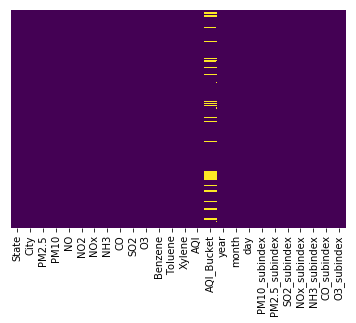

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
data["AQI_Bucket"] = data["AQI_Bucket"].fillna(data["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [ ]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
0,Gujarat,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,...,2015,1,1,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Gujarat,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,...,2015,2,1,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Gujarat,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,...,2015,3,1,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Gujarat,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,...,2015,4,1,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Gujarat,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,...,2015,5,1,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000


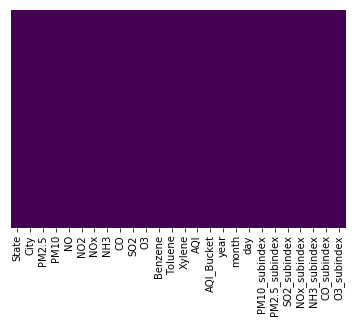

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# HANDLING OUTLIERS

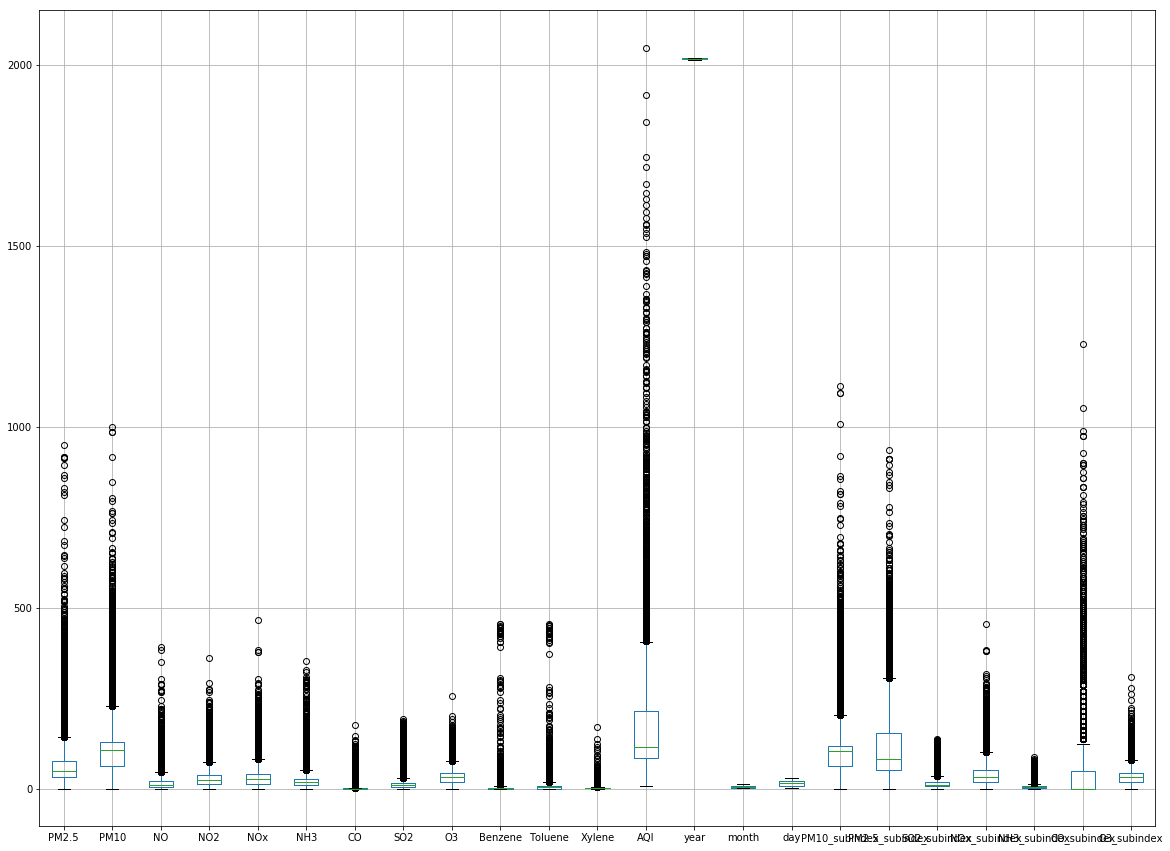

In [ ]:
#Finding outliers
graph=data.select_dtypes(include=['float64','int64'])
graph.boxplot(figsize=(20,15))
plt.show()

In [ ]:
#Outliers count in each column
#data=data.drop(['Date'],axis=1)
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

AQI               1289
AQI_Bucket           0
Benzene           1639
CO                2922
CO_subindex       2320
City                 0
NH3               2118
NH3_subindex      1979
NO                2021
NO2               1260
NOx               1855
NOx_subindex      1820
O3                1059
O3_subindex        939
PM10              1980
PM10_subindex     1500
PM2.5             2405
PM2.5_subindex    2920
SO2               3443
SO2_subindex      3636
State                0
Toluene           3246
Xylene            1951
day                  0
month                0
year                 0
dtype: int64


In [ ]:
data.columns

Index(['State', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'year', 'month', 'day', 'PM10_subindex', 'PM2.5_subindex',
       'SO2_subindex', 'NOx_subindex', 'NH3_subindex', 'CO_subindex',
       'O3_subindex'],
      dtype='object')

In [ ]:
for features in ['Benzene','CO','NH3','NO','NO2','PM2.5','PM10','NOx','O3','SO2','Toluene','Xylene','AQI','CO_subindex','NH3_subindex','NOx_subindex','O3_subindex','PM10_subindex','PM2.5_subindex','SO2_subindex']:
         OF_Q1=data[features].quantile(0.25)
         OF_Q2=data[features].quantile(0.50)
         OF_Q3=data[features].quantile(0.75)
         OF_IQR=OF_Q3-OF_Q1
         OF_low_limit=OF_Q1-1.5*OF_IQR
         OF_up_limit=OF_Q3+1.5*OF_IQR
         OF_outlier=data[(data[features]<OF_low_limit)|(data[features]>OF_low_limit)]
         data[features]=data[features].clip(OF_up_limit,OF_low_limit)

In [ ]:
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

AQI               0
AQI_Bucket        0
Benzene           0
CO                0
CO_subindex       0
City              0
NH3               0
NH3_subindex      0
NO                0
NO2               0
NOx               0
NOx_subindex      0
O3                0
O3_subindex       0
PM10              0
PM10_subindex     0
PM2.5             0
PM2.5_subindex    0
SO2               0
SO2_subindex      0
State             0
Toluene           0
Xylene            0
day               0
month             0
year              0
dtype: int64


# ENCODING STATE AND CITY

In [ ]:
data['State'].replace({'Gujarat':0, 'Mizoram':1, 'Andhra Pradesh':2, 'Punjab':3, 'Karnataka':4,\
                       'Madhya Pradesh':5, 'Odisha':6, 'Chandigarh':7, 'Tamilnadu':8, 'Delhi':9,\
                       'Kerala':10, 'Haryana':11, 'Assam':12, 'Telengana':13, 'Rajasthan':14,\
                       'Jharkhand':15, 'West Bengal':16, 'Uttar Pradesh':17,'Maharashtra':18,\
                       'Bihar':19, 'Meghalaya':20},inplace=True)


In [ ]:
data['City'].replace({'Ahmedabad':0, 'Aizawl':1, 'Amaravati':2, 'Amritsar':3, 'Bengaluru':4,\
                      'Bhopal':5, 'Brajrajnagar':6, 'Chandigarh':7, 'Chennai':8, 'Coimbatore':9,\
                      'Delhi':10, 'Ernakulam':11, 'Gurugram':12, 'Guwahati':13, 'Hyderabad':14,\
                      'Jaipur':15, 'Jorapokhar':16, 'Kochi':17, 'Kolkata':18, 'Lucknow':19, 'Mumbai':20,\
                      'Patna':21, 'Shillong':22, 'Talcher':23,'Thiruvananthapuram':24,'Visakhapatnam':25},inplace=True)

# HANDLING OF CYCLIC DATA

In [ ]:
data['month_sin'] = np.sin(data['month']*(2.*np.pi/12))
data['month_cos'] = np.cos(data['month']*(2.*np.pi/12))


In [ ]:
#Feature Engineering

y=data['AQI']
X = data[['year','State','City', 'month_sin','month_cos']]

In [ ]:
X.head()

,year,State,City,month_sin,month_cos
0,2015,0,0,0.500000,8.660254e-01
1,2015,0,0,0.866025,5.000000e-01
2,2015,0,0,1.000000,6.123234e-17
3,2015,0,0,0.866025,-5.000000e-01
4,2015,0,0,0.500000,-8.660254e-01


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# MODEL SELECTION

In [ ]:
models = {
    'Linear Regression(Ridge)' : Ridge(),
    '          Neural Network' : MLPRegressor(),
    '           Random Forest' : RandomForestRegressor(),
    '                Catboost' : CatBoostRegressor(verbose=0),
    '       XGBoost Regressor' : XGBRegressor(),
    '    XGBoost RF Regressor' : XGBRFRegressor(),
    'Linear Regression(lasso)' : Lasso(),
    '       Linear Regression' : LinearRegression(),
    ' Light Gradient Boosting' : LGBMRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Linear Regression(Ridge) trained.


In [ ]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_test-y_pred)**2))
    return rmse

def get_r2(y_true,y_pred):
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    return r2

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + ' R^2: {:.5f}'.format(r2))

In [ ]:
X.tail()

# MODEL SELECTION

In [ ]:
model_cat=CatBoostRegressor(verbose=0)
model_cat.fit(X_train, y_train)


In [ ]:
x_predict = [2024,2,25,2028,5.000000e-01,0.866025]
import numpy as np
x_predict = np.array(x_predict).reshape(1,-1)

In [ ]:
predicted_value =model_cat.predict(x_predict) 
print("Predicted value : ",predicted_value)

# HYPERTUNING OF PARAMETERS

In [ ]:
parameters = {'depth'         : [6,8,10],
            'learning_rate' : [0.01, 0.05, 0.1],
             'iterations'    : [30, 50, 100]
             }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model_cat, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)


In [ ]:
model_cat=CatBoostRegressor(depth=10,iterations=100,learning_rate=0.1)
model_cat.fit(X_train, y_train)

In [ ]:
y_pred = model_cat.predict(X_test)
rmse = get_rmse(y_test, y_pred)
print(' RMSE: {:.2f}'.format(rmse))

In [ ]:
y_pred = model_cat.predict(X_test)
r2 = get_r2(y_test, y_pred)
print(' R^2: {:.5f}'.format(r2))

In [ ]:
#There is no significant difference after hypertuning.